In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

import displayData as dd
import lrCostFunction as lCF
import oneVsAll as ova
import predictOneVsAll as pova


In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 input images of Digits
num_labels = 10         # 10 labels, from 0 to 9
                        # Note that we have mapped "0" to label 10

In [3]:
# ===================== Part 1: Loading and Visualizing Data =====================
# We start the exercise by first loading and visualizing the dataset.
# You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...')

data = scio.loadmat('ex3data1.mat')
X = data['X']
y = data['y'].flatten()
m = y.size

Loading and Visualizing Data ...


In [6]:
data['X'].shape

(5000, 400)

In [26]:
def display_data(x):
    (m, n) = x.shape

    # Set example_width automatically if not passed in
    example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)

    # Compute the number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                              pad + display_rows * (example_height + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(x[curr_ex]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          x[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display image
    plt.figure()
    plt.imshow(display_array, cmap='gray', extent=[-1, 1, -1, 1])
    plt.axis('off')


In [17]:
rand_indices = np.random.permutation(range(m))
selected = X[rand_indices[0:100], :]

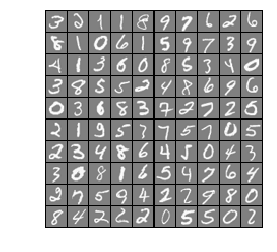

In [27]:
display_data(selected)

In [ ]:
# ===================== Part 2-a: Vectorize Logistic Regression =====================
# In this part of the exercise, you will reuse your logistic regression
# code from the last exercise. Your task here is to make sure that your
# regularized logistic regression implementation is vectorized. After
# that, you will implement one-vs-all classification for the handwritten
# digit dataset
#

# Test case for lrCostFunction
print('Testing lrCostFunction()')

In [36]:
np.max(data['X'])

1.127688299158888

In [69]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape((3, 5)).T/10]
y_t = np.array([1, 0, 1, 0, 1])
lmda_t = 3

In [ ]:
# sigmoid function
sigmoid_func = lambda x: 1 / (1 + np.exp(-x))
# sigmoid_func = lambda x: np.exp(x) / (np.exp(x)+1)

In [ ]:
# hypothesis function 
h_func = lambda theta, X: sigmoid_func(theta @ X.transpose()) 

In [ ]:

def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [70]:
theta = theta_t
X = X_t
y = y_t
lmd = lmda_t

In [73]:
(-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m  + (theta @ theta) * lmd / (2*m) 

0.1867409698054872

In [72]:
(-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m  + (theta @ theta) * lmd / (2*m) 

0.1867409698054872

In [ ]:
def lr_cost_function(theta, X, y, lmd):
    m = y.size

    # You need to return the following values correctly
    cost = 0
    grad = np.zeros(theta.shape)

    # ===================== Your Code Here =====================
    # Instructions : Compute the cost of a particular choice of theta
    #                You should set cost and grad correctly.
    #

    cost = (-y @ np.log(h_func(theta, X)) - (1-y) @ np.log((1-h_func(theta, X)))) / m  + (theta @ theta) * lmd / (2*m) 
    # =========================================================

    return cost, grad


In [ ]:

cost, grad = lCF.lr_cost_function(theta_t, X_t, y_t, lmda_t)

np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
print('Cost: {:0.7f}'.format(cost))
print('Expected cost: 2.534819')
print('Gradients:\n{}'.format(grad))
print('Expected gradients:\n[ 0.146561 -0.548558 0.724722 1.398003]')

input('Program paused. Press ENTER to continue')

In [ ]:


# ===================== Part 2-b: One-vs-All Training =====================
print('Training One-vs-All Logistic Regression ...')

lmd = 0.1
all_theta = ova.one_vs_all(X, y, num_labels, lmd)

input('Program paused. Press ENTER to continue')

# ===================== Part 3: Predict for One-Vs-All =====================

pred = pova.predict_one_vs_all(all_theta, X)

print('Training set accuracy: {}'.format(np.mean(pred == y)*100))

input('ex3 Finished. Press ENTER to exit')
